# Data Exploration

1. What is the avareage ROI (Gross/Budget) for Country?
2. How do rating compare to Budget, Gross and ROI.

In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [5]:
Movies = Path("../Datasets/movies.csv")

In [6]:
Omdb = Path("../Datasets/omdb.csv")

In [7]:
# Import datasets Movies
movies_df = pd.read_csv(Movies)
#movies_df.head(3)

In [8]:
# Import datasets Omdb
omdb_df = pd.read_csv(Omdb)
#omdb_df.head(3)

In [9]:
# columns manipulations Movie
movies_df.columns

Index(['movieid', 'title', 'mpaa_rating', 'budget', 'gross', 'release_date',
       'genre', 'runtime', 'rating', 'rating_count', 'summary'],
      dtype='object')

In [10]:
movies_df = movies_df[['title', 'mpaa_rating', 'genre','budget', 'gross','rating',]]
#movies_df.head(3)

In [11]:
movies_df = movies_df.rename(columns={"title":"Title"})
#movies_df.head(3)

In [12]:
# columns manipulations Omdb
omdb_df.columns

Index(['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director',
       'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster',
       'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type',
       'DVD', 'BoxOffice', 'Production', 'Website', 'Response', 'Error',
       'totalSeasons'],
      dtype='object')

In [13]:
omdb_df = omdb_df[['Title',  'Genre',  'Country', 'Awards','DVD']]
omdb_df.head(3)

,Title,Genre,Country,Awards,DVD
0,Look Who's Talking,Comedy,United States,5 wins & 2 nominations,12 Feb 2014
1,Driving Miss Daisy,"Comedy, Drama, Romance",United States,Won 4 Oscars. 22 wins & 24 nominations total,03 Oct 2008
2,Turner & Hooch,"Comedy, Crime, Drama",United States,1 win & 1 nomination,01 Jan 2014


In [14]:
# columns manipulations Merged
firstM_df = pd.merge(movies_df, omdb_df, how="left", on="Title")
firstM_df.columns

Index(['Title', 'mpaa_rating', 'genre', 'budget', 'gross', 'rating', 'Genre',
       'Country', 'Awards', 'DVD'],
      dtype='object')

In [15]:
firstM_df = firstM_df [['Title', 'mpaa_rating', 'genre', 'budget', 'gross', 'rating', 'Genre',
       'Country',]]
firstM_df.head(3)

,Title,mpaa_rating,genre,budget,gross,rating,Genre,Country
0,Look Who's Talking,PG-13,Romance,7500000,296000000,5.9,Comedy,United States
1,Driving Miss Daisy,PG,Comedy,7500000,145793296,7.4,"Comedy, Drama, Romance",United States
2,Turner & Hooch,PG,Crime,13000000,71079915,7.2,"Comedy, Crime, Drama",United States


In [16]:
# Splitting the Country column 
firstM_df[["Country_1","Country_2", "Country_3", "Country_4","Country_5"]]= firstM_df["Country"].str.split(', ', n=4, expand=True)
firstM_df.tail(3)

,Title,mpaa_rating,genre,budget,gross,rating,Genre,Country,Country_1,Country_2,Country_3,Country_4,Country_5
651,Dawn of the Planet of the Apes,PG-13,Science Fiction,170000000,710644566,7.6,"Action, Adventure, Drama","United States, United Kingdom, Canada",United States,United Kingdom,Canada,None,None
652,Guardians of the Galaxy,PG-13,Action,170000000,773328629,8.0,"Action, Adventure, Comedy",United States,United States,None,None,None,None
653,Maleficent,PG,Fantasy,180000000,758539785,7.0,"Adventure, Family, Fantasy",United States,United States,None,None,None,None


In [17]:
# columns 'Country_1', 'Country_2', 'Country_3' into one column
firstM_df= firstM_df.set_index(['Title', 'mpaa_rating', 'genre', 'budget', 'gross', 'rating', 'Genre',
       'Country'])[['Country_1', 'Country_2', 'Country_3', 'Country_4', 'Country_5']].stack().reset_index()
firstM_df.tail(3)

,Title,mpaa_rating,genre,budget,gross,rating,Genre,Country,level_8,0
983,Dawn of the Planet of the Apes,PG-13,Science Fiction,170000000,710644566,7.6,"Action, Adventure, Drama","United States, United Kingdom, Canada",Country_3,Canada
984,Guardians of the Galaxy,PG-13,Action,170000000,773328629,8.0,"Action, Adventure, Comedy",United States,Country_1,United States
985,Maleficent,PG,Fantasy,180000000,758539785,7.0,"Adventure, Family, Fantasy",United States,Country_1,United States


In [18]:
# Renaming  "Countries"
firstM_df = firstM_df.rename(columns={0: 'Countries'})

In [19]:
firstM_df= firstM_df[['Title', 'mpaa_rating', 'genre', 'budget', 'gross', 'rating', 'Genre',
       'Country','Countries']]
firstM_df.head(3)

,Title,mpaa_rating,genre,budget,gross,rating,Genre,Country,Countries
0,Look Who's Talking,PG-13,Romance,7500000,296000000,5.9,Comedy,United States,United States
1,Driving Miss Daisy,PG,Comedy,7500000,145793296,7.4,"Comedy, Drama, Romance",United States,United States
2,Turner & Hooch,PG,Crime,13000000,71079915,7.2,"Comedy, Crime, Drama",United States,United States


In [20]:
firstM_df['Countries'].unique()

array(['United States', 'United Kingdom', 'Japan', 'Mexico', 'France',
       'Italy', 'Canada', 'Germany', 'Australia', 'Taiwan', 'Hong Kong',
       'China', 'Malta', 'Morocco', 'Sweden', 'Spain', 'New Zealand',
       'South Korea', 'Hungary', 'Jordan', 'India',
       'United Arab Emirates', 'Netherlands', 'Norway', 'Czech Republic',
       'Russia', 'Switzerland', 'Thailand', 'Bahamas', 'Bulgaria',
       'North Korea', 'Poland', 'Slovenia', 'Belgium', 'USA', 'Turkey',
       'Denmark'], dtype=object)

In [21]:
firstM_df['Countries']

0       United States
1       United States
2       United States
3       United States
4       United States
            ...      
981     United States
982    United Kingdom
983            Canada
984     United States
985     United States
Name: Countries, Length: 986, dtype: object

In [22]:
OtraMerged = pd.DataFrame(firstM_df['Countries'].value_counts())
#OtraMerged

In [23]:
grossMerged = firstM_df[['Countries','gross']]
grossMerged = grossMerged .groupby('Countries')
grossMerged = grossMerged .mean().reset_index()
#grossMerged

In [24]:
budgetMerged = firstM_df[['Countries','budget']]
budgetMerged = budgetMerged .groupby('Countries')
budgetMerged = budgetMerged .mean().reset_index()
#budgetMerged

In [25]:
FirstQuestMerged = pd.merge(grossMerged, budgetMerged , on="Countries")
FirstQuestMerged.head()

,Countries,gross,budget
0,Australia,5.129381e+08,129500000.0
1,Bahamas,5.990460e+08,150000000.0
2,Belgium,5.637493e+08,110000000.0
3,Bulgaria,4.541619e+08,60000000.0
4,Canada,5.153787e+08,110450000.0


In [26]:
grossMerged['gross'] = grossMerged['gross'].astype(int)
#grossMerged

In [27]:
budgetMerged ['budget'] = budgetMerged['budget'].astype(int)
#budgetMerged

In [28]:
FirstQuestMerged = pd.merge(grossMerged, budgetMerged , on="Countries")
FirstQuestMerged.head()

,Countries,gross,budget
0,Australia,512938138,129500000
1,Bahamas,599045960,150000000
2,Belgium,563749323,110000000
3,Bulgaria,454161935,60000000
4,Canada,515378698,110450000


In [29]:
FirstQuestMerged = pd.merge(grossMerged, budgetMerged , on="Countries")
FirstQuestMerged

,Countries,gross,budget
0,Australia,512938138,129500000
1,Bahamas,599045960,150000000
2,Belgium,563749323,110000000
3,Bulgaria,454161935,60000000
4,Canada,515378698,110450000
5,China,583791243,141136363
6,Czech Republic,383247268,148750000
7,Denmark,469160692,60000000
8,France,503558538,77275862
9,Germany,347542121,96764705


In [30]:
FirstQuestMerged = pd.merge(omdb_df, movies_df, on="Title", how="inner")

In [31]:
FirstQuestMerged["ROI"] = (FirstQuestMerged ["gross"] - FirstQuestMerged ["budget"]) / FirstQuestMerged ["budget"]
FirstQuestMerged

,Title,Genre,Country,Awards,DVD,mpaa_rating,genre,budget,gross,rating,ROI
0,Look Who's Talking,Comedy,United States,5 wins & 2 nominations,12 Feb 2014,PG-13,Romance,7500000,296000000,5.9,38.466667
1,Driving Miss Daisy,"Comedy, Drama, Romance",United States,Won 4 Oscars. 22 wins & 24 nominations total,03 Oct 2008,PG,Comedy,7500000,145793296,7.4,18.439106
2,Turner & Hooch,"Comedy, Crime, Drama",United States,1 win & 1 nomination,01 Jan 2014,PG,Crime,13000000,71079915,7.2,4.467686
3,Born on the Fourth of July,"Biography, Drama, War",United States,Won 2 Oscars. 15 wins & 26 nominations total,19 Apr 2016,R,War,14000000,161001698,7.2,10.500121
4,Field of Dreams,"Drama, Family, Fantasy",United States,Nominated for 3 Oscars. 8 wins & 14 nomination...,15 Jun 2012,PG,Drama,15000000,84431625,7.5,4.628775
...,...,...,...,...,...,...,...,...,...,...,...
616,Interstellar,"Adventure, Drama, Sci-Fi","United States, United Kingdom, Canada",Won 1 Oscar. 44 wins & 148 nominations total,24 May 2016,PG-13,Science Fiction,165000000,675120017,8.6,3.091636
617,Captain America: The Winter Soldier,"Action, Adventure, Sci-Fi",United States,Nominated for 1 Oscar. 5 wins & 52 nominations...,19 Aug 2014,PG-13,Action,170000000,714766572,7.7,3.204509
618,Dawn of the Planet of the Apes,"Action, Adventure, Drama","United States, United Kingdom, Canada",Nominated for 1 Oscar. 17 wins & 48 nomination...,01 Dec 2015,PG-13,Science Fiction,170000000,710644566,7.6,3.180262
619,Guardians of the Galaxy,"Action, Adventure, Comedy",United States,Nominated for 2 Oscars. 52 wins & 103 nominati...,15 Nov 2015,PG-13,Action,170000000,773328629,8.0,3.548992


In [32]:
FirstQuestMerged[["Country", "rating", "budget", "gross", "ROI"]].head()

,Country,rating,budget,gross,ROI
0,United States,5.9,7500000,296000000,38.466667
1,United States,7.4,7500000,145793296,18.439106
2,United States,7.2,13000000,71079915,4.467686
3,United States,7.2,14000000,161001698,10.500121
4,United States,7.5,15000000,84431625,4.628775


In [33]:
FirstQuestMerged[['Title', 'budget', 'rating']].sort_values('budget')

,Title,budget,rating
214,The Blair Witch Project,60000,6.5
61,The Crying Game,3705538,7.2
384,My Big Fat Greek Wedding,5000000,6.5
313,Get Out,5000000,7.7
421,Fahrenheit 9/11,6000000,7.5
...,...,...,...
332,Justice League,300000000,6.1
333,Star Wars: The Last Jedi,317000000,6.9
374,Avengers: Endgame,356000000,8.4
569,Pirates of the Caribbean: On Stranger Tides,380000000,6.6


In [34]:
unique_countries = FirstQuestMerged['Country'].unique()
print(f"There are {len(unique_countries)} countries in the DataFrame")
unique_countries

There are 85 countries in the DataFrame


array(['United States', 'United States, United Kingdom',
       'United States, Japan', 'United States, Mexico',
       'United States, France', 'United Kingdom, Japan',
       'France, United States', 'United Kingdom, United States',
       'United States, Italy, France, Japan', 'United States, Canada',
       'United States, United Kingdom, Canada, Japan',
       'United States, United Kingdom, Italy', 'Germany, United States',
       'United States, Mexico, Germany', 'United States, Germany',
       'United States, Australia', 'United States, Germany, Canada',
       'Taiwan, Hong Kong, United States, China',
       'United Kingdom, France, United States',
       'United States, United Kingdom, Malta, Morocco',
       'United States, Canada, Sweden', 'United States, Spain',
       'Hong Kong, United States', 'New Zealand, United States',
       'United States, United Kingdom, Japan, Germany',
       'United States, China, Hong Kong',
       'United States, South Korea, Australia',
 

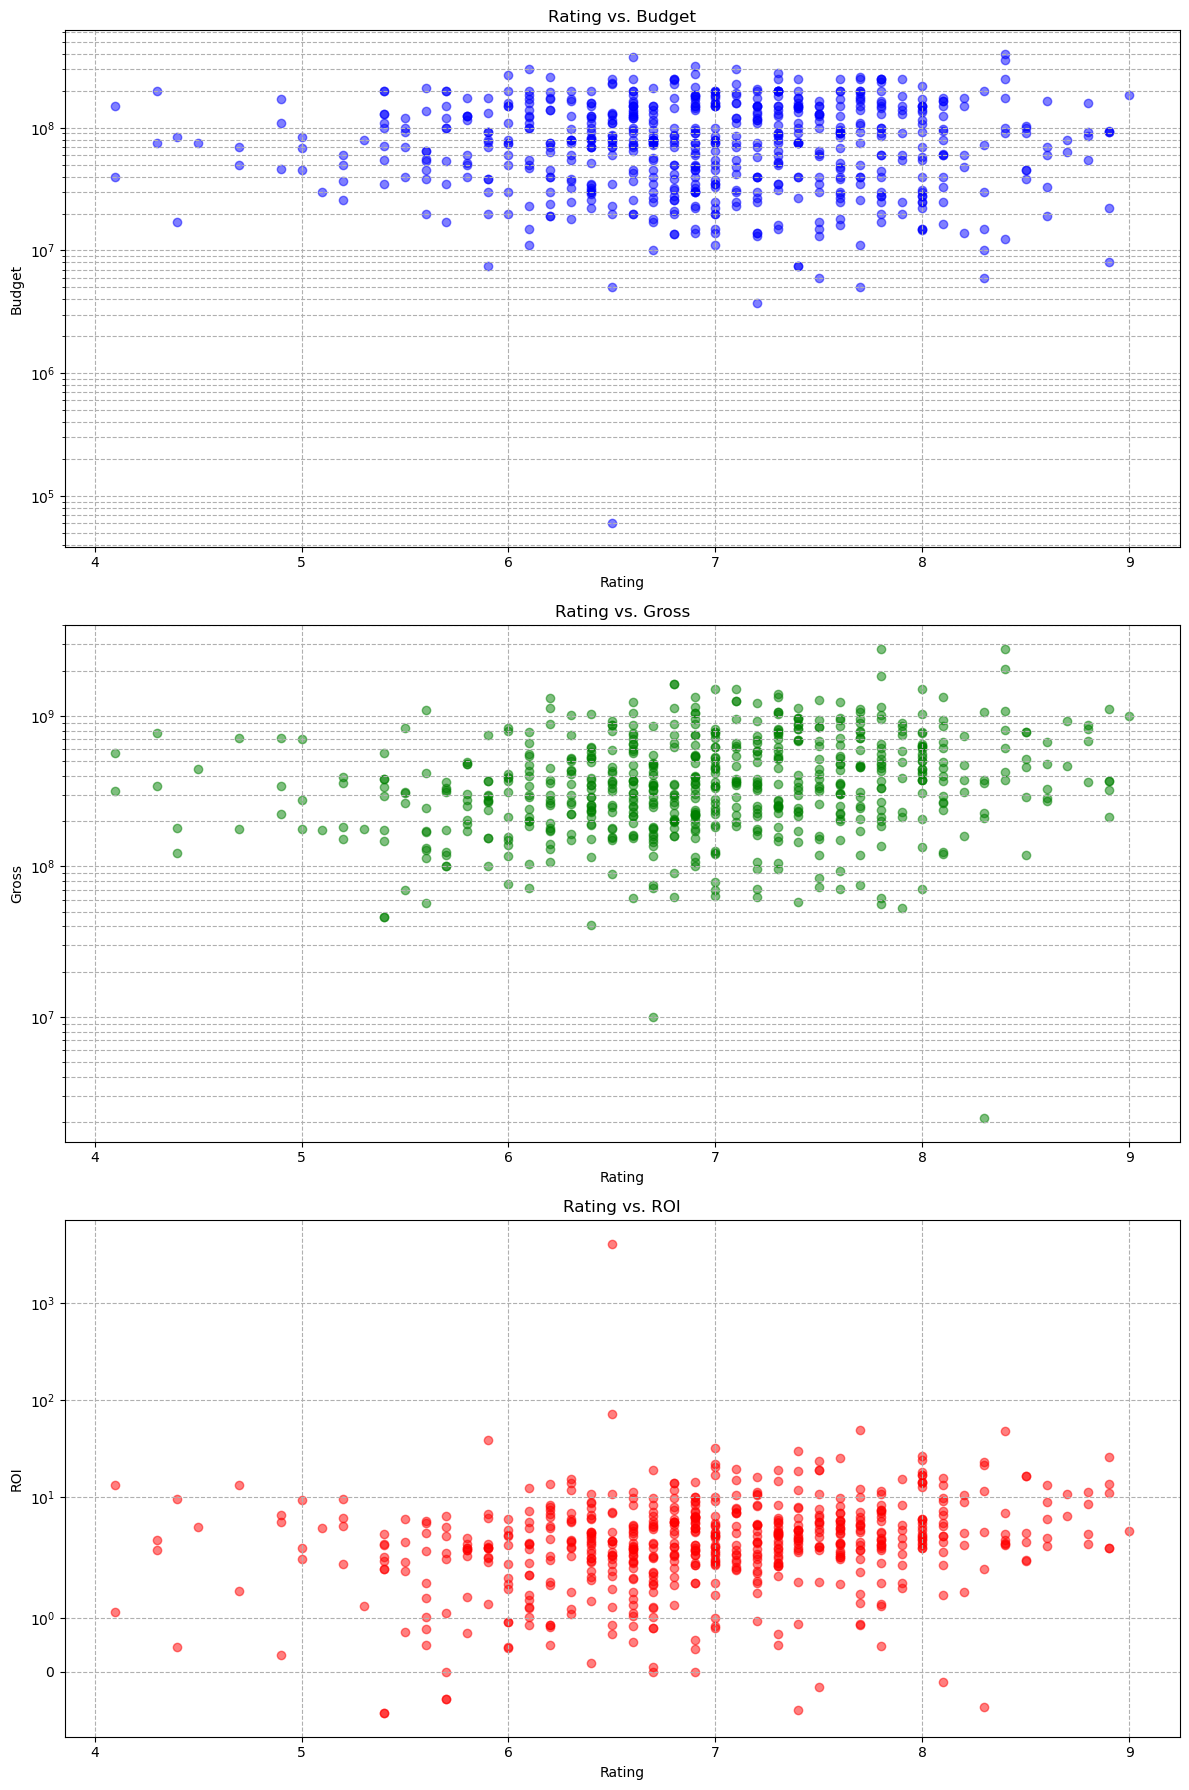

In [35]:
# Create scatter plots to visualize the relationships
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# Scatter plot for Rating vs. Budget
ax[0].scatter(FirstQuestMerged["rating"], FirstQuestMerged["budget"], alpha=0.5, color="blue")
ax[0].set_title('Rating vs. Budget')
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Budget')
ax[0].set_yscale('log')
ax[0].grid(True, which="both", ls="--")

# Scatter plot for Rating vs. Gross
ax[1].scatter(FirstQuestMerged["rating"], FirstQuestMerged["gross"], alpha=0.5, color="green")
ax[1].set_title('Rating vs. Gross')
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('Gross')
ax[1].set_yscale('log')
ax[1].grid(True, which="both", ls="--")

# Scatter plot for Rating vs. ROI
ax[2].scatter(FirstQuestMerged["rating"], FirstQuestMerged["ROI"], alpha=0.5, color="red")
ax[2].set_title('Rating vs. ROI')
ax[2].set_xlabel('Rating')
ax[2].set_ylabel('ROI')
ax[2].set_yscale('symlog')
ax[2].grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()

In [36]:
correlations = FirstQuestMerged[["rating", "budget", "gross", "ROI"]].corr()
rating_correlations = correlations["rating"]

In [37]:
rating_correlations

rating    1.000000
budget    0.034620
gross     0.234700
ROI      -0.014063
Name: rating, dtype: float64